In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load Iris.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

# (Q) how many data-points and features?
print (haberman.shape)


#(Q) What are the column names in our dataset?
print (haberman.columns)


(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


# 2-D Scatter Plot

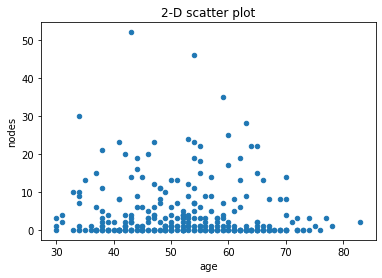

In [6]:

#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

haberman.plot(kind='scatter', x='age', y='nodes') ;
plt.title("2-D scatter plot")
plt.show()


<b>Observations</b>

Mostly patients have zero node

# 2-D Scatter plot with color-coding for different status.

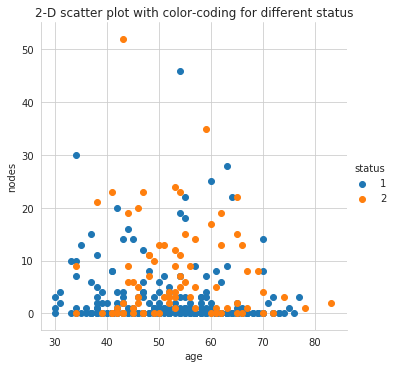

In [9]:
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("2-D scatter plot with color-coding for different status")
plt.show();

<b>Observations</b>

The blue and orange dots are not found separated\
So its not possible to take any decision of patient survival based on age and node parameters\
Need to do futher analysis using other plotting method to get output

# Pair-Plot

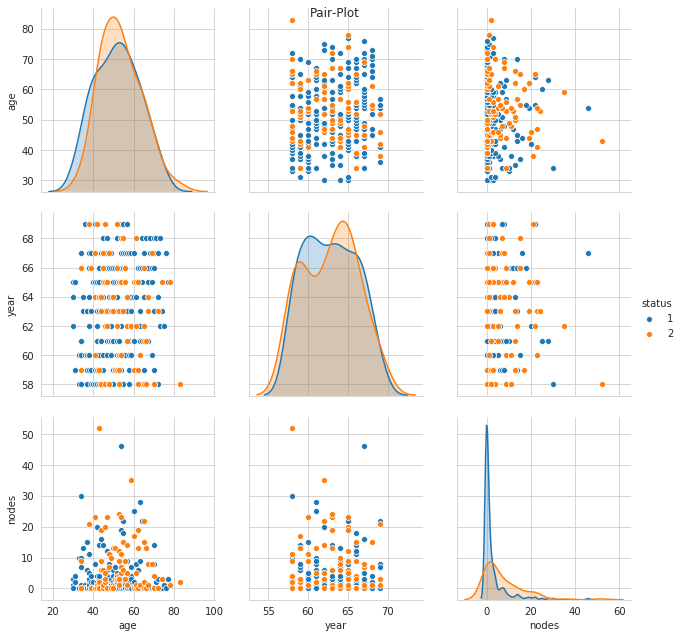

In [11]:
#Pair-plot

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status",
             vars=['age','year','nodes'], height=3)
plt.suptitle("Pair-Plot")
plt.show()


<b>Observations</b>\
No proper separation still found as age  of patient in both group is same almost

# PDF

# PDF with age parameter

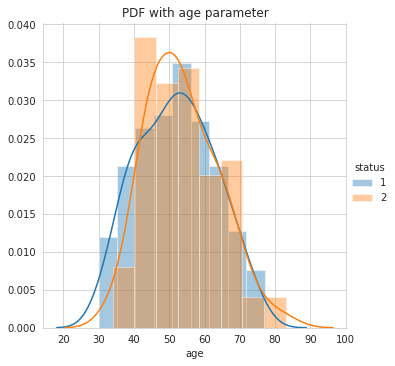

In [12]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("PDF with age parameter")
plt.show();


<b>Observations</b>

We cannot get to a categorical result using age as lot of overlapping is present\
But age of 30 to 33 have most chances to survive\
Age 34 to 40 can live more compare to 40 to 70 age range

# PDF with node parameter

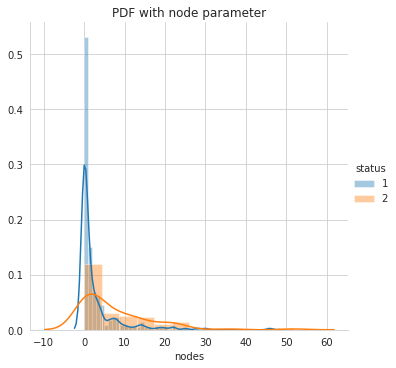

In [14]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("PDF with node parameter")
plt.show();

<b>Observations

It can be clearly observed that node 1 have significant chances to survive\
It keeps on decresing as nodes increases

# PDF with year parameter

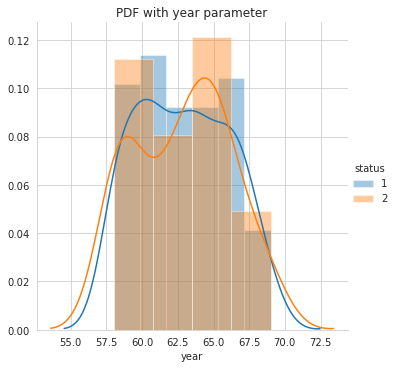

In [15]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("PDF with year parameter")
plt.show();

<b>Observations
    
Again a wide overlaping is present.But most deaths were bewteen year 1958-1960 and 1963-1966 

# CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


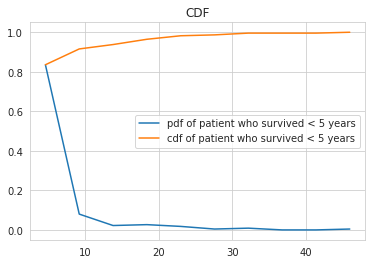

In [16]:
#CDF

status_positive = haberman.loc[haberman["status"] == 1];
status_negative = haberman.loc[haberman["status"] == 2];

counts, bin_edges = np.histogram(status_positive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.legend(['pdf of patient who survived < 5 years','cdf of patient who survived < 5 years']);
plt.title("CDF")
plt.show();

<b>Observations

    Around 83.55  survivals have node value bewteen 0 to 4.6 which again proves less nodes
    result in more survival chances

# Histogram

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


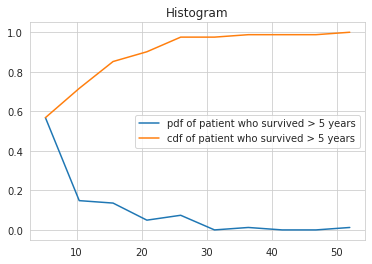

In [17]:
#Histogram

counts, bin_edges = np.histogram(status_negative['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.legend(['pdf of patient who survived > 5 years','cdf of patient who survived > 5 years']);
plt.title("Histogram")
plt.show();


# Box-Plot

# Box-plot with age as parameter

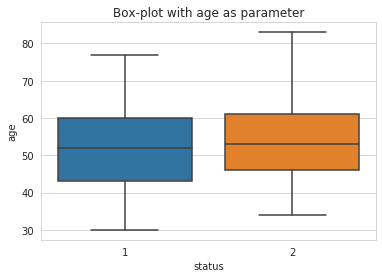

In [19]:
# Box-Plot

sns.boxplot(x='status',y='age', data=haberman)
plt.title("Box-plot with age as parameter")
plt.show()

# Box-plot with year as parameter

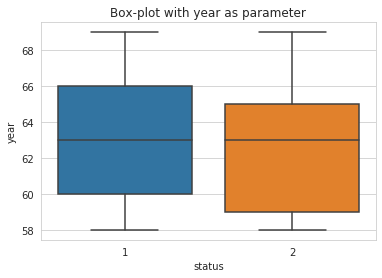

In [20]:
sns.boxplot(x='status',y='year', data=haberman)
plt.title("Box-plot with year as parameter")
plt.show()


# Box-plot with nodes as parameter

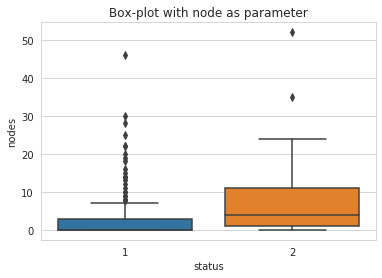

In [21]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title("Box-plot with node as parameter")
plt.show()

# Violin Plots

# Violin-plot with age as parameter

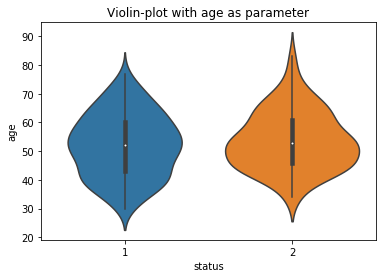

In [3]:
#Violin Plot

sns.violinplot(x="status", y="age", data=haberman, height=8)
plt.title("Violin-plot with age as parameter")
plt.show()


# Violin-plot with year as parameter

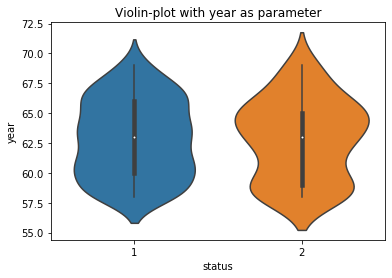

In [4]:
sns.violinplot(x="status", y="year", data=haberman, height=8)
plt.title("Violin-plot with year as parameter")
plt.show()


# Violin-plot with nodes as parameter

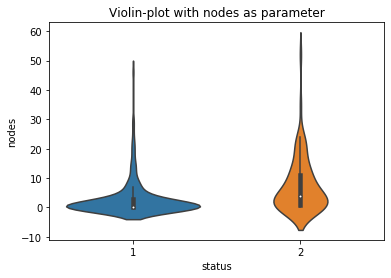

In [5]:
sns.violinplot(x="status", y="nodes", data=haberman, height=8)
plt.title("Violin-plot with nodes as parameter")
plt.show()

<b> Observations:
    
Surviving rate is highly dependent on number of nodes\
Patient with 0 node have most chances to live while the one having above five nodes have least\
Age between 45-60 have most deaths but death rate is not realted to higher age






<b> Reference 

    I have motly refered course EDA program for complition of assignment